In [197]:
import numpy as np
import pandas as pd

**Loading the Dataset**  
The dataset is loaded using `pd.read_csv`, which reads the CSV file containing wage data.

In [199]:
data = pd.read_csv("DT-Wage.csv")
# data

**Displaying dataset overview** <br>
Head, Summary statistics and count of missing values for each column.

In [201]:
# print("Displaying the first few rows of the dataset:")
# print(data.head())

# print("---------------------------------------------")
# print("Displaying summary statistics for the dataset:")
# print(data.describe())

# print("---------------------------------------------")
# print("Displaying the count of missing values for each column:")
# print(data.isnull().sum())

**Dropping Uninformative Column**  
The `region` column is dropped because all its values are identical.

In [203]:
data = data.drop('region', axis=1)
# data

**One-Hot Encoding for Categorical Features**  
This cell converts categorical columns (`maritl`, `race`, `education`, `jobclass`, `health`, `health_ins`) into binary dummy variables, allowing the model to process them as numerical features.

In [205]:
data = pd.get_dummies(data, columns=['maritl', 'race', 'education', 'jobclass', 'health', 'health_ins'], prefix=['maritl', 'race', 'education', 'jobclass', 'health', 'health_ins'])
# data

**Ensuring Consistent Data Types**  
Here, all columns in the dataset are cast to integer type to maintain uniformity across the data.

In [207]:
data = data.astype(int)
# data

**Cleaning Column Names**  
Special characters are removed from column names to ensure compatibility with libraries that may have restrictions on column naming.

In [209]:
data.columns = data.columns.str.replace(r'[^\w\s]', '', regex=True)
# data

**Separating Features and Target Variable**  
The target variable (`wage`) is separated from the feature set (`X`). This prepares the data for model training and testing.

In [211]:
X = data.drop(columns=['wage'])
y = data['wage']
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


**Splitting the Data into Training, Validation, and Test Sets**  
The dataset is split into training, validation, and test sets, with 70% for training and the remaining 30% split equally for validation and testing.

In [213]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(2100, 23)
(2100,)
(450, 23)
(450,)
(450, 23)
(450,)


In [214]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

**Training and Evaluating SVR Model with RBF Kernel** <br>
This section implements a Support Vector Regression (SVR) model utilizing a Radial Basis Function (RBF) kernel, which is trained on the designated training dataset. Following the training process, predictions are generated on the validation set, and the Mean Squared Error (MSE) is calculated to quantitatively evaluate the model's performance.

In [215]:
svr_model = SVR(kernel='rbf').fit(X_train, y_train)
y_val_pred = svr_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
print(f"Validation MSE: {mse_val}")

Validation MSE: 1687.8905142305464


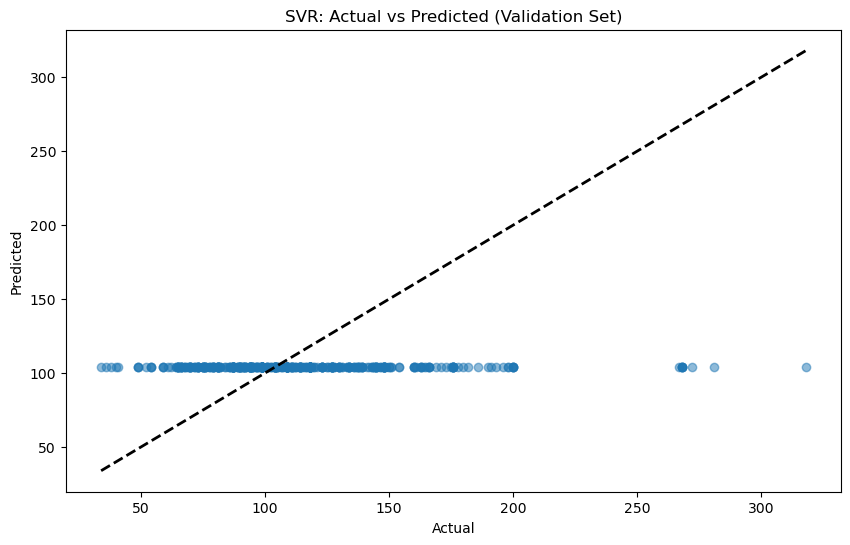

In [216]:
# Plot predicted vs actual values for the validation set
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5)  # Plot the actual vs predicted values
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)  # Ideal line
plt.xlabel('Actual')  # Label for the x-axis (actual values)
plt.ylabel('Predicted')  # Label for the y-axis (predicted values)
plt.title('SVR: Actual vs Predicted (Validation Set)')  # Title of the plot
plt.show()

**Training and Evaluating SVR Model with Linear Kernel** <br>
In this step, the SVR model is retrained utilizing a linear kernel with specified hyperparameters: C=100 and epsilon=0.5. Subsequently, the model is evaluated on the validation set, and the mean squared error (MSE) is computed for the validation dataset.

In [217]:
svr_model = SVR(C=100, epsilon=0.5, kernel='linear').fit(X_train, y_train)
y_val_pred = svr_model.predict(X_val)
mse_val = mean_squared_error(y_val, y_val_pred)
print(f"Validation MSE: {mse_val}")

Validation MSE: 593.4011413354158


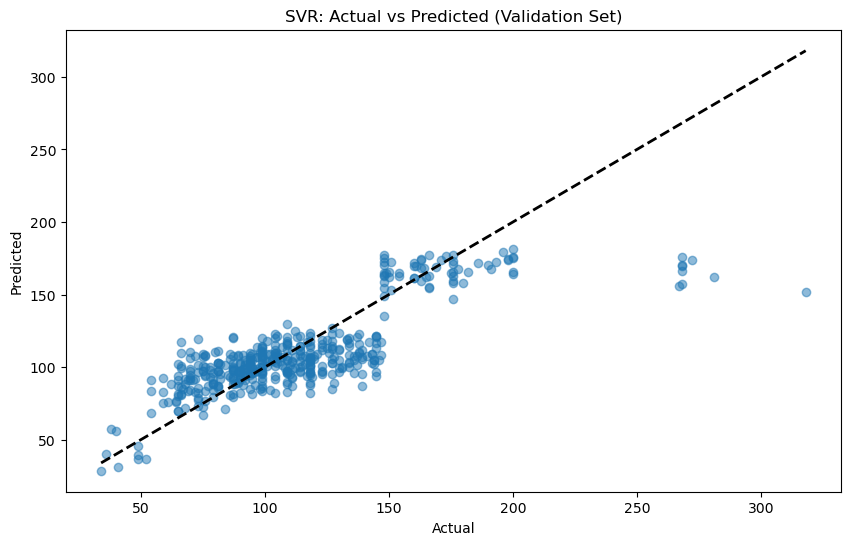

In [218]:
# Plot predicted vs actual values for the validation set
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.5)  # Plot the actual vs predicted values
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)  # Ideal line
plt.xlabel('Actual')  # Label for the x-axis (actual values)
plt.ylabel('Predicted')  # Label for the y-axis (predicted values)
plt.title('SVR: Actual vs Predicted (Validation Set)')  # Title of the plot
plt.show()

**Training and Evaluating SVR Model on Test Set** <br>
In this step, the SVR model is evaluated using the test set (X_test) to determine its ability to generalize to unseen data. The Mean Squared Error (MSE) is computed to assess the model's performance.

In [219]:
svr_model = SVR(C=100, epsilon=0.5, kernel='linear').fit(X_train, y_train)
y_test_pred = svr_model.predict(X_test)
mse_val = mean_squared_error(y_test, y_test_pred)
print(f"Validation MSE: {mse_val}")

Validation MSE: 635.1291994310685


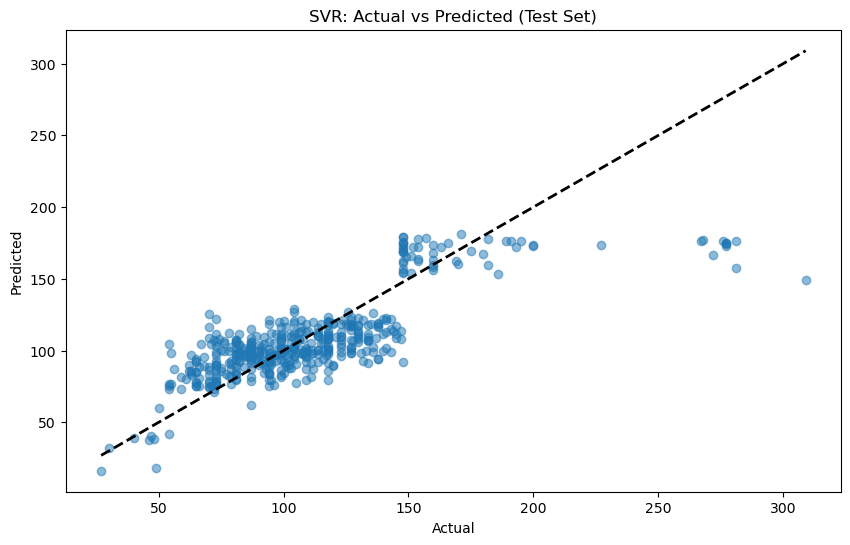

In [220]:
# Plot predicted vs actual values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)  # Plot actual vs predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Ideal line
plt.xlabel('Actual')  # Label for the x-axis (actual values)
plt.ylabel('Predicted')  # Label for the y-axis (predicted values)
plt.title('SVR: Actual vs Predicted (Test Set)')  # Title of the plot
plt.show()